In [171]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Descriptive Analysis

In [172]:
data = pd.read_csv('data/test.csv')
data

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
0,2019-07-28T11:00:00Z,2019-07-29,18,2019-07-29 FR 146,SXF-STN,FR 146,73.43,€
1,2019-07-28T11:00:00Z,2019-07-29,22,2019-07-29 FR 8545,SXF-STN,FR 8545,180.53,€
2,2019-07-28T11:00:00Z,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,61.19,€
3,2019-07-28T23:00:00Z,2019-07-30,6,2019-07-30 FR 144,SXF-STN,FR 144,73.43,€
4,2019-07-28T11:00:00Z,2019-07-30,10,2019-07-30 FR 8543,SXF-STN,FR 8543,180.53,€
...,...,...,...,...,...,...,...,...
5119,2019-07-31T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5120,2019-08-01T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€
5121,2019-08-01T23:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€
5122,2019-08-02T11:00:00Z,2019-09-10,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€


In [197]:
##The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but 
##internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more 
##efficiently store the data.
data['Flight_Date'] = pd.to_datetime(data['Flight_Date']) #warum ist Flight_Date nach der Formatänderung erneut ein Object?
data['route_abb'] = data['route_abb'].astype('category')
data['flight_unique_id'] = data['flight_unique_id'].astype('category')
data.dtypes

Request_Date                object
Flight_Date         datetime64[ns]
Departure_hour               int64
flight_unique_id          category
route_abb                 category
flight_number               object
Price                      float64
Currency                    object
dtype: object

In [198]:
data.sample(n=5)

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency
78,2019-07-30T23:00:00Z,2019-08-02,6,2019-08-02 FR 144,SXF-STN,FR 144,42.83,€
529,2019-08-01T11:00:00Z,2019-08-06,18,2019-08-06 FR 1546,FRA-STN,FR 1546,132.59,€
4738,2019-08-01T11:00:00Z,2019-09-07,7,2019-09-07 FR 1687,STN-FRA,FR 1687,31.61,£
4086,2019-07-28T11:00:00Z,2019-09-02,18,2019-09-02 FR 1546,FRA-STN,FR 1546,75.47,€
478,2019-07-29T23:00:00Z,2019-08-06,7,2019-08-06 FR 1687,STN-FRA,FR 1687,76.49,£


In [199]:
##we use a string accessor to retrieve the first route
data.groupby(
  data['route_abb'].str.split(' ').str[0]
).size()

route_abb
FRA-STN     929
STN-FRA     899
STN-SXF    1588
SXF-STN    1708
dtype: int64

In [205]:
#Group flight dates by routes and return the counted value (Quelle: https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/)
group_by_route = data.groupby(['Flight_Date','route_abb'])
group_by_route.size().unstack()

route_abb,FRA-STN,STN-FRA,STN-SXF,SXF-STN
Flight_Date,,,,
2019-07-29,0,0,0,2
2019-07-30,0,0,0,10
2019-07-31,2,0,0,13
2019-08-01,11,4,1,26
2019-08-02,15,14,21,34
2019-08-03,19,12,10,31
2019-08-04,22,13,23,27
2019-08-05,24,19,41,46
2019-08-06,24,23,42,48


In [224]:
#data['flight_unique_id'].dt.Flight_Date.value_counts().sort_index()
group_by_routes = data.groupby(['flight_unique_id','route_abb'])
group_by_routes.size().unstack()

route_abb,FRA-STN,STN-FRA,STN-SXF,SXF-STN
flight_unique_id,,,,
2019-07-29 FR 146,0,0,0,1
2019-07-29 FR 8545,0,0,0,1
2019-07-30 FR 144,0,0,0,2
2019-07-30 FR 146,0,0,0,3
2019-07-30 FR 8543,0,0,0,2
...,...,...,...,...
2019-09-09 FR 8545,0,0,0,12
2019-09-10 FR 144,0,0,0,12
2019-09-10 FR 145,0,0,12,0


2019-08-26    144
2019-09-05    144
2019-08-29    144
2019-08-13    144
2019-08-20    144
2019-08-12    144
2019-08-19    144
2019-09-03    144
2019-08-16    144
2019-08-23    144
2019-09-06    144
2019-08-15    144
2019-08-09    142
2019-08-30    142
2019-09-02    142
2019-09-09    142
2019-08-22    140
2019-08-08    140
2019-08-06    137
2019-08-27    136
2019-08-05    130
2019-09-08    120
2019-08-17    120
2019-08-31    120
2019-08-21    120
2019-08-25    120
2019-09-07    120
2019-08-18    120
2019-08-24    120
2019-08-11    120
2019-08-10    120
2019-08-14    120
2019-08-28    120
2019-09-04    117
2019-09-01    117
2019-08-07    113
2019-08-04     85
2019-08-02     84
2019-08-03     72
2019-09-10     48
2019-08-01     42
2019-07-31     15
2019-07-30     10
2019-07-29      2
Name: Flight_Date, dtype: int64
Plot how many flights per day


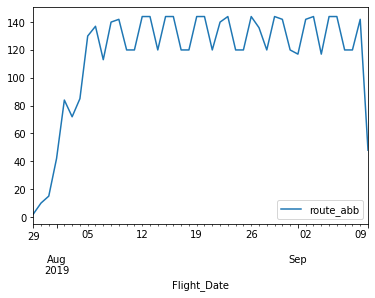

In [227]:
#Calculate number of flights which have same Flight_Date
freq_flights = data['Flight_Date'].value_counts()
print(freq_flights) #should be used for y-Axes of the plot; freq_flights is DataFrameGroupBy Object

print("Plot how many flights per day")
fig, ax = plt.subplots()
df = data.groupby(['Flight_Date']).count()['route_abb'].plot(ax=ax)
ax.legend()
plt.show()

Number of total flights per Flight Date


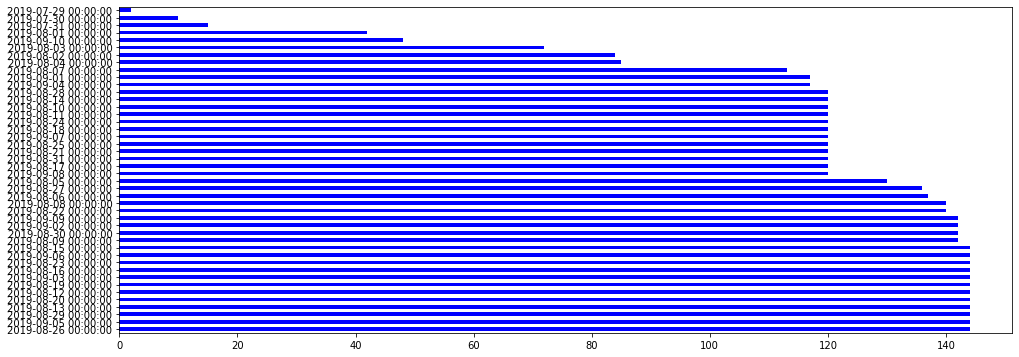

In [181]:
#Quelle(https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/)
print("Number of total flights per Flight Date")
freq_flights.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')


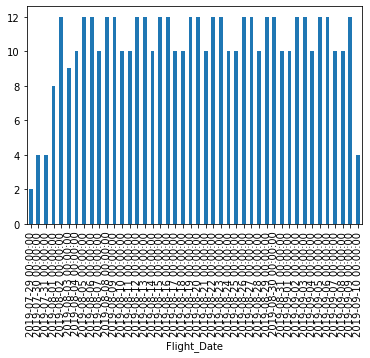

In [183]:
ax = plt.gca()
data.groupby('Flight_Date')['flight_unique_id'].nunique().plot(kind='bar')
plt.show()

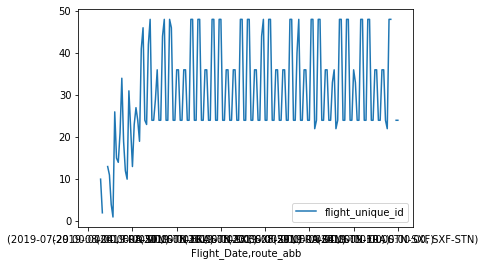

In [233]:
#df = pd.data['Flight_Date', 4], columns=['a', 'b', 'c', 'd'])
#df.plot.bar(stacked=True);

fig, ax = plt.subplots()
df = data.groupby(['Flight_Date', 'route_abb']).count()['flight_unique_id'].plot(ax=ax)
ax.legend()
plt.show()